$$
\log p(w) \propto -\frac{\beta}{2} (y - Xw)^T (y - Xw) - \frac{\alpha}{2} \|w\|^2
$$

$$
\log p(w) \propto -\frac{1}{2} w^T (\underbrace{\beta X^TX + \alpha I}_{\Sigma^{-1}}) w  + \beta w^T X^T y
$$

$$
\log p(w) \propto -\frac{1}{2} w^T (\underbrace{\beta X^TX + \alpha I}_{\Sigma^{-1}}) w  + w^T \underbrace{\beta X^T y}_{\Sigma^{-1} \mu}
$$

$$
\Sigma = (\beta X^TX + \alpha I)^{-1}
$$

$$
\mu = \Sigma\beta X^T y = (\beta X^TX + \alpha I)^{-1}\beta X^T y = w_{\text{MAP}} 
$$

$$
\log p(w) \propto -\frac{1}{2} w^T \Sigma^{-1} w  + w^T \Sigma^{-1} \mu = -\frac{1}{2} (w - \mu)^T \Sigma^{-1} (w - \mu) + \frac{1}{2} \mu^T \Sigma^{-1} \mu
$$

$$
p(w|data, \beta, \alpha) \propto \exp\left\{-\frac{1}{2} (w - \mu)^T \Sigma^{-1} (w - \mu) \right\}
$$

The posterior is over the regression parameters $w$ is:
$$
p(w|data, \beta, \alpha) = \frac{1}{|2\pi\Sigma|^{1/2}} \exp\left\{-\frac{1}{2} (w - \mu)^T \Sigma^{-1} (w - \mu) \right\}, \,\,\, \Sigma = (\beta X^TX + \alpha I)^{-1}, \,\,\, \mu = \Sigma\beta X^T y
$$

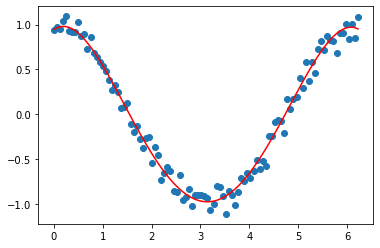

In [108]:
import numpy as np
import matplotlib.pylab as plt

def design_matrix(x, degree):
    return np.power.outer(x, np.arange(degree+1))

np.random.seed(1243)

N = 100
freq = 1
x = np.linspace(0, 2*np.pi, N, endpoint=False)

# true model + noise-free data
degree_true = 4
theta_true = np.polyfit(x, np.cos(freq*x), degree_true)[::-1]
X_true = design_matrix(x, degree_true) 
y_true = X_true @ theta_true

# generating artificial noise + data
sigma = 0.1
y = y_true + np.random.standard_normal(N) * sigma

# model with potentially wrong degree
degree = 10
X = design_matrix(x, degree)

fig, ax = plt.subplots()
ax.plot(x, y_true, color='r')
ax.scatter(x, y);

In [105]:
beta = 1/sigma**2
alpha = 1.
Sigma = np.linalg.inv(beta * X.T @ X + alpha * np.eye(degree+1))
mu = beta * Sigma @ X.T @ y

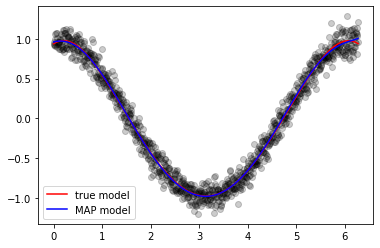

In [106]:
fig, ax = plt.subplots()
ax.plot(x, y_true, color='r', label='true model')
ax.plot(x, X@mu, color='b', label='MAP model')
ax.scatter(x, y, color='k', alpha=0.2)
ax.legend();

/home/mhabeck/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


   Posterior mean: [ 0.961  0.161 -0.558 -0.142  0.147 -0.008 -0.014  0.005 -0.001  0.
 -0.   ]
              MAP: [ 0.96   0.165 -0.556 -0.154  0.158 -0.012 -0.014  0.005 -0.001  0.
 -0.   ]
true coefficients: [ 0.938  0.402 -1.097  0.329 -0.026]


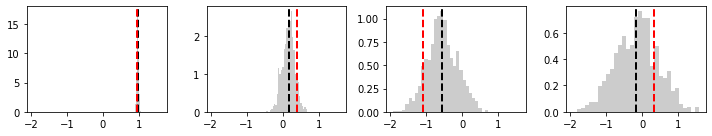

In [107]:
# Monte Carlo does this differently
w_samples = np.random.multivariate_normal(mu, Sigma, size=1000)

fig, ax = plt.subplots(1, 4, figsize=(10, 2), sharex='all')
for i, (a, w) in enumerate(zip(ax, w_samples.T)):
    a.hist(w, bins=30, density=True, alpha=0.2, color='k')
    a.axvline(mu[i], color='k', ls='--', lw=2)
    a.axvline(theta_true[i], color='r', ls='--', lw=2)
fig.tight_layout()
print('   Posterior mean:', np.round(w_samples.mean(0), 3))
print('              MAP:', np.round(mu, 3))
print('true coefficients:', np.round(theta_true, 3))

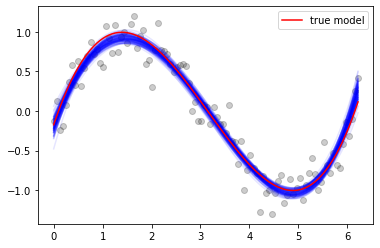

In [26]:
fig, ax = plt.subplots()
for w in w_samples:
    ax.plot(x, X@w, color='b', alpha=0.1)
ax.plot(x, y_true, color='r', label='true model')
ax.scatter(x, y, color='k', alpha=0.2)
ax.legend();

* https://en.wikipedia.org/wiki/Monty_Hall_problem

* https://en.wikipedia.org/wiki/Multivariate_normal_distribution